In [1]:
%matplotlib inline

# Numerical libraries
import numpy as np   
# to handle data in form of rows and columns 
import pandas as pd    

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from scipy.stats import zscore
from pprint import pprint


# READ DATA

In [2]:
data = pd.read_csv  ("survey_ncr.csv")
print(data.dtypes)
print()
print("Data Shape:",data.shape)
data.head()

age                int64
job_type          object
education         object
education_num      int64
job               object
marital_status    object
religion          object
gender            object
hours_per_week     int64
income            object
dtype: object

Data Shape: (29834, 10)


,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,47,Private,10th,6,Executive,Unmarried,ST,Female,45,less than 30 k INR
1,40,Private,10th,6,Mechanic,Unmarried,ST,Male,40,less than 30 k INR
2,30,Private,10th,6,Other-service,Unmarried,ST,Male,40,less than 30 k INR
3,27,Private,10th,6,Taxi-driver,Unmarried,ST,Male,75,less than 30 k INR
4,38,Private,10th,6,Driver,Unmarried,Christians,Female,40,less than 30 k INR


# DUMMY CREATION

In [3]:
data.job_type.replace(['Government', 'Private'],[1,2], inplace=True)

In [4]:
data.education.replace(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Bachelors', 'College', 
                        'Doctorate', 'High School Pass', 'Masters', 'Prof-school', 'diploma', 'illiterate'],
                       [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)

In [5]:
data.job.replace(['Army', 'Call Center', 'Domestic Servants', 'Driver', 'Executive', 'Farmer', 'Fireman', 'Manager',
                  'Mechanic', 'Other-service', 'Police', 'Sales', 'Taxi-driver', 'Teacher'],
                 [1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)

In [6]:
data.religion.replace(['Christians', 'Hindu', 'Muslim', 'Other', 'ST'],[1,2,3,4,5], inplace=True)

In [7]:
data.marital_status.replace(['Married', 'Unmarried'],[1,2], inplace=True)

In [8]:
data.income.replace(['less than 30 k INR', 'more than 30 k INR'],[1,2], inplace=True)

In [9]:
data.gender.replace(['Female', 'Male'],[1,2], inplace=True)

In [10]:
data.dtypes

age               int64
job_type          int64
education         int64
education_num     int64
job               int64
marital_status    int64
religion          int64
gender            int64
hours_per_week    int64
income            int64
dtype: object

# Question 1. Analyse the data (descriptive statistics and visualization)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,29834.0,38.673594,13.011830,18.0,28.0,37.0,47.0,90.0
job_type,29834.0,1.856808,0.350275,1.0,2.0,2.0,2.0,2.0
education,29834.0,9.035027,2.945922,1.0,8.0,9.0,11.0,15.0
education_num,29834.0,10.159415,2.535954,1.0,9.0,10.0,13.0,16.0
job,29834.0,9.098311,3.623772,1.0,5.0,10.0,12.0,14.0
marital_status,29834.0,1.535161,0.498771,1.0,1.0,2.0,2.0,2.0
religion,29834.0,2.107260,0.477312,1.0,2.0,2.0,2.0,5.0
gender,29834.0,1.677147,0.467575,1.0,1.0,2.0,2.0,2.0
hours_per_week,29834.0,41.157203,11.809319,1.0,40.0,40.0,45.0,99.0
income,29834.0,1.251659,0.433974,1.0,1.0,1.0,2.0,2.0


In [12]:
data.skew()

age               0.546207
job_type         -2.037438
education        -1.079869
education_num    -0.324943
job              -0.364514
marital_status   -0.141001
religion          2.814494
gender           -0.757777
hours_per_week    0.380619
income            1.144574
dtype: float64

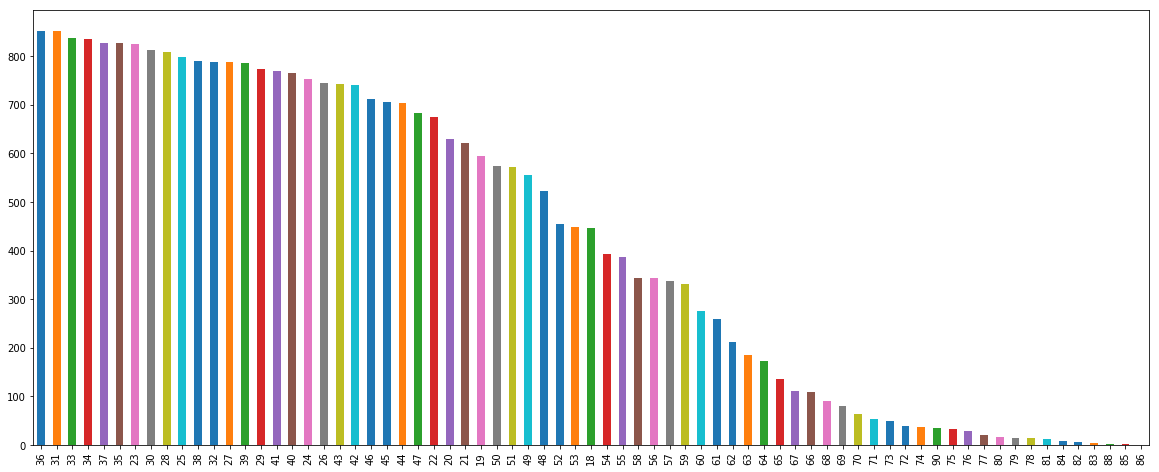

In [13]:
#print(data.age.value_counts())
plt.figure(figsize=(20,8))

data.age.value_counts().plot(kind='bar')

2    25562
1     4272
Name: job_type, dtype: int64


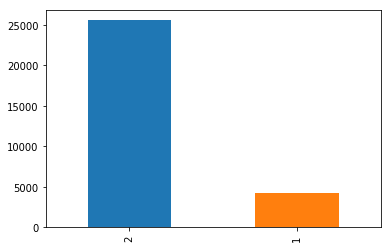

In [14]:
print(data.job_type.value_counts())

data.job_type.value_counts().plot(kind='bar')

11    9833
9     6676
8     5044
3     1652
12    1627
14    1008
2      894
1      714
6      554
13     542
7      432
10     375
5      287
4      151
15      45
Name: education, dtype: int64


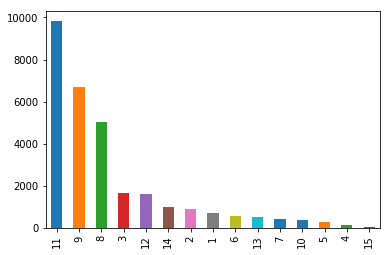

In [15]:
print(data.education.value_counts())

data.education.value_counts().plot(kind='bar')

9     9833
10    6676
13    5044
14    1627
11    1307
12    1008
7      894
6      714
4      554
15     542
5      432
16     375
8      345
3      287
2      151
1       45
Name: education_num, dtype: int64


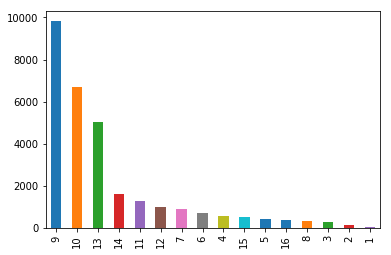

In [16]:
print(data.education_num.value_counts())

data.education_num.value_counts().plot(kind='bar')

14    4028
9     4016
5     3991
11    3698
12    3498
10    3083
4     1964
13    1569
3     1311
6      980
2      911
7      641
8      135
1        9
Name: job, dtype: int64


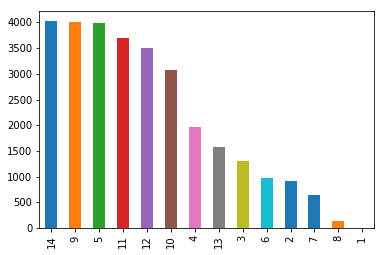

In [17]:
print(data.job.value_counts())

data.job.value_counts().plot(kind='bar')

2    15966
1    13868
Name: marital_status, dtype: int64


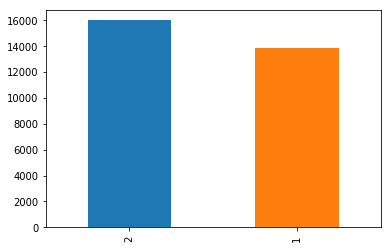

In [18]:
print(data.marital_status.value_counts())

data.marital_status.value_counts().plot(kind='bar')

2    25639
3     2791
1      894
5      283
4      227
Name: religion, dtype: int64


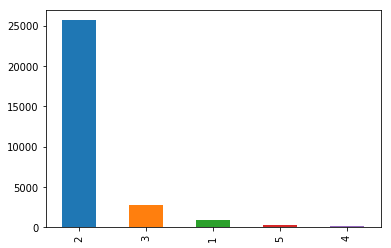

In [19]:
print(data.religion.value_counts())

data.religion.value_counts().plot(kind='bar')

2    20202
1     9632
Name: gender, dtype: int64


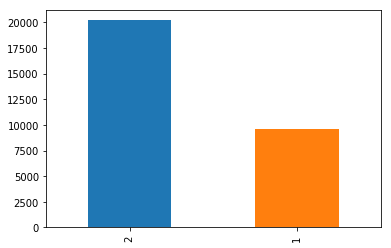

In [20]:
print(data.gender.value_counts())

data.gender.value_counts().plot(kind='bar')

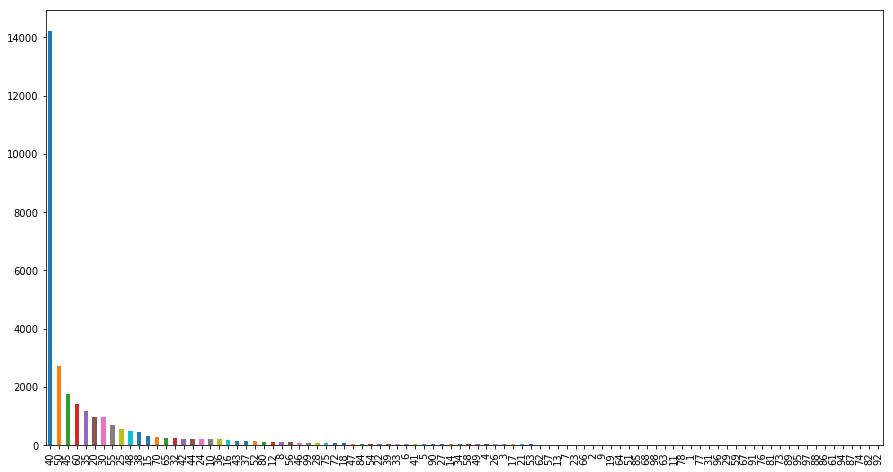

In [21]:
#print(data.hours_per_week.value_counts())
plt.figure(figsize=(15,8))

data.hours_per_week.value_counts().plot(kind='bar')

1    22326
2     7508
Name: income, dtype: int64


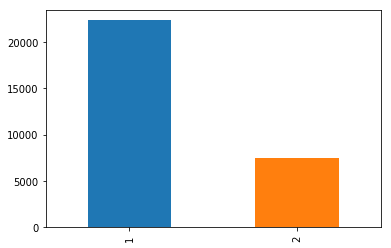

In [22]:
print(data.income.value_counts())

data.income.value_counts().plot(kind='bar')

In [23]:
data_z = data.apply(zscore) #Apply ztest to remove different units

In [24]:
data_z.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,0.639921,0.408807,-2.727554,-1.640206,-1.130971,0.931985,6.060576,-1.448235,0.325409,-0.579905
1,0.101940,0.408807,-2.727554,-1.640206,-0.027130,0.931985,6.060576,0.690496,-0.097992,-0.579905
2,-0.666604,0.408807,-2.727554,-1.640206,0.248830,0.931985,6.060576,0.690496,-0.097992,-0.579905
3,-0.897167,0.408807,-2.727554,-1.640206,1.076711,0.931985,6.060576,0.690496,2.865818,-0.579905
4,-0.051769,0.408807,-2.727554,-1.640206,-1.406931,0.931985,-2.319820,-1.448235,-0.097992,-0.579905


In [25]:
y = data_z[['income']]
X = data_z.drop(labels= "income" , axis = 1)

splitting data into train and test 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20883, 9), (8951, 9), (20883, 1), (8951, 1))

In [27]:
# splitting data into training and test set for independent attributes

train_set = data.head(20000) # Up to the last initial training set row
test_set = data.tail(9834) # Past the last initial training set row

# capture the target column ("income") into separate vectors for training set and test set
train_labels = train_set.pop("income")
test_labels = test_set.pop("income")



# Question 2. Build a Random Forest model to predict Income

In [28]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(train_set, train_labels)
rfcl
test_pred = rfcl.predict(test_set)
rfcl.score(train_set, train_labels)


0.94445

In [29]:
rfcl.score(test_set , test_labels)

0.8169615619280048

# Question 3. Build a Gradient Boosting model to predict Income

In [30]:
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(train_set, train_labels)
test_pred = gbcl.predict(test_set)
gbcl.score(train_set, train_labels)

0.82915

In [31]:
gbcl.score(test_set , test_labels)

0.8181818181818182

# Question 4. Improve the accuracy by optimizing hyperparameters of the models

MODEL TUNING USE HYPERPARAMETER :Random classifier


In [53]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [54]:
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [56]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(train_set, train_labels);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.9s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.1s finished


In [57]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'bootstrap': True}

In [58]:
best_random_rf = rf_random.best_estimator_

best_random_rf.score(test_set , test_labels)

0.8260117958104535

GridSearchCV : RandomForestClassifier

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}

In [60]:
rfc = RandomForestClassifier(random_state = 1)

In [61]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [62]:
# Fit the grid search to the data
grid_search.fit(train_set, train_labels);

In [63]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 7}

In [64]:
best_grid_rf = grid_search.best_estimator_
best_grid_rf.score(test_set , test_labels)

0.8108602806589383

GridSearchCV : RandomForestClassifier

In [65]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
} 

In [66]:
rfc = RandomForestClassifier(random_state = 1)

In [67]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [68]:
# Fit the grid search to the data
grid_search.fit(train_set, train_labels);

In [69]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 6}

In [70]:
best_grid_rf = grid_search.best_estimator_
best_grid_rf.score(test_set , test_labels)

0.798352654057352

Model Tuning using hyper parameters: Gradient Boosting

In [71]:
gb = GradientBoostingClassifier(random_state=1)

In [72]:
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [73]:
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [74]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 60 , stop = 150, num = 2)]   # returns evenly spaced 10 numbers

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
warm_start = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'warm_start': bootstrap}

pprint(random_grid)

{'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [60, 150],
 'warm_start': [True, False]}


In [75]:
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(train_set, train_labels);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    4.1s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.0s finished


In [76]:
gb_random.best_params_

{'warm_start': False,
 'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 2}

In [77]:
best_random_gb = gb_random.best_estimator_

best_random_gb.score(test_set , test_labels)

0.8206223306894448

GridSearchCV : Gradient Boosting Classifier

In [80]:
param_grid = {
    'max_depth': [5,6],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
} 

In [81]:
gbc = GradientBoostingClassifier(random_state = 1)

In [82]:
grid_search = GridSearchCV(estimator = gbc, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [83]:
# Fit the grid search to the data
grid_search.fit(train_set, train_labels);

In [84]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 6}

In [85]:
best_grid_gb = grid_search.best_estimator_
best_grid_gb.score(test_set , test_labels)

0.7456782591010779

# Question 6. Comparison of the models performance and suggest the best model

Comparison of the models performance Gradient Boosting model is the best model and the test accuracy is 81.81%

# Question 5. Find the important variables 

In [46]:
regression_model = LinearRegression()  #SIMPLE LINEAR MODEL
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 0.11759142573628548
The coefficient for job_type is -0.0027795185671024097
The coefficient for education is -0.02703274812166214
The coefficient for education_num is 0.2990318944718822
The coefficient for job is -0.010020866115727311
The coefficient for marital_status is -0.35659476141768337
The coefficient for religion is -0.01622881187808311
The coefficient for gender is 0.02617273727045978
The coefficient for hours_per_week is 0.09379938581926796


In [47]:
ridge = Ridge(alpha=0.3)  #RIDGE MODEL
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.11759129 -0.00278023 -0.02703075  0.299027   -0.01001992 -0.35658893
  -0.01622937  0.02617509  0.09379928]]


In [48]:
lasso = Lasso(alpha=0.1)   #LASSO MODEL
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.03875387 -0.          0.          0.20353352  0.         -0.31435681
 -0.          0.          0.0252054 ]


In [49]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.311327617937058
0.30752344569367684


In [50]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.31132761788577323
0.30752350565099795


In [51]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.280592165337752
0.2799784253347546
